			### SYSTEME DE RECOMMANDATIONS BASED SUR LE FILTRAGE COLLABORATIF ###

* Objectif : Il s'agira de mettre en place un système de recommandations des produits complémentaires à un client lors de son achat ou de sa commande en ligne.

* Avantages: Ce système permettra à des sites e-commerce comme amazon, alibaba et autres d'augmenter leurs chiffres d'affaires et d'obtenir plus de revenu par clients et de comprendre le comportement des utilisateurs.


						### Filtrage Collaboratif ###

* Le Filtrage Collaboratif est une méthode puissante pour les systèmes de recommandations, car il se base sur les interactions utilisateur-produit pour suggérer des produits similaires ou complémentaires ou pour prédire si un utilisateur pourrait aimer ce produit ou non.
* Notons donc que cette technique est divisée en deux grandes approches :
	* Basé sur les utilisateurs(User-Based Collaborative Filtering)
	* Base sur les éléments (Item-based Collaborative Filtering)

* Pour cet notebook, nous irons étape par étape pour chaque approche et detaillé les principales étapes à suivre.

* A - Importation des librairies 

In [1]:
import pandas as pd # pour le load data et manipuler les données
import numpy as np # pour manipuler les tableauet matrices
import seaborn as sns # pour la visualisation
import matplotlib.pyplot as plt 
import warnings, os, re, random
from sklearn.metrics.pairwise import cosine_similarity # pour evaluer la similarity 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

* B - Chargement des données et affichages

In [2]:
df = pd.read_csv('../data/online_retail.csv')
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
35975,539437,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,4,2010-12-17 14:54:00,2.51,NaN,United Kingdom
142633,548621,22899,CHILDREN'S APRON DOLLY GIRL,2,2011-04-01 11:54:00,2.10,16960.0,United Kingdom
413602,572317,23245,SET OF 3 REGENCY CAKE TINS,1,2011-10-23 16:13:00,4.95,14629.0,United Kingdom
254182,559298,21700,BIG DOUGHNUT FRIDGE MAGNETS,12,2011-07-07 12:38:00,0.85,12471.0,Germany
99769,544788,22814,CARD PARTY GAMES,12,2011-02-23 12:18:00,0.42,13089.0,United Kingdom


* C- Analyse descriptives et preparation des données

In [3]:
## analyse générale des données
print(df.describe())

# les infos sur les données 
print(f"Info data \n: {df.info()}")

## valeurs manquantes
print(f'Nombres de valeurs manquantes : {df.isnull().sum()}')

## verifier les doublons dans les datas
print(f"nombre de doublons :{df.duplicated().sum()}")

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
d

* D- Analyse approfondies pour une meilleure compréhension

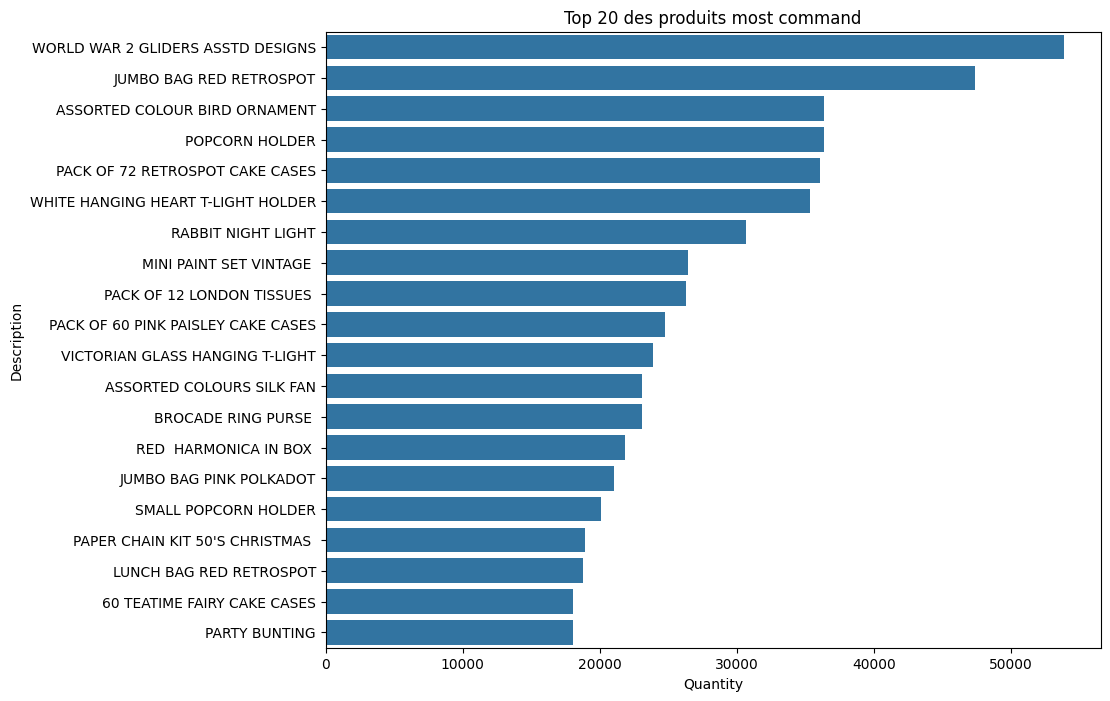

<Figure size 640x480 with 0 Axes>

In [4]:
## top 20 des produits les plus commandées ou achetées par les clients

top_produits = df.groupby('Description')['Quantity'].sum().reset_index().sort_values('Quantity', ascending = False)
plt.figure(figsize = (10, 8))
z = sns.barplot(x = 'Quantity', y = 'Description', data = top_produits.head(20))
plt.title('Top 20 des produits most command')
plt.show()
plt.savefig('Top20_produits')

/tmp/ipykernel_7334/503788684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  z = sns.barplot(x = 'CustomerID', y = 'Quantity', palette='viridis', data = top_customers.head(20))


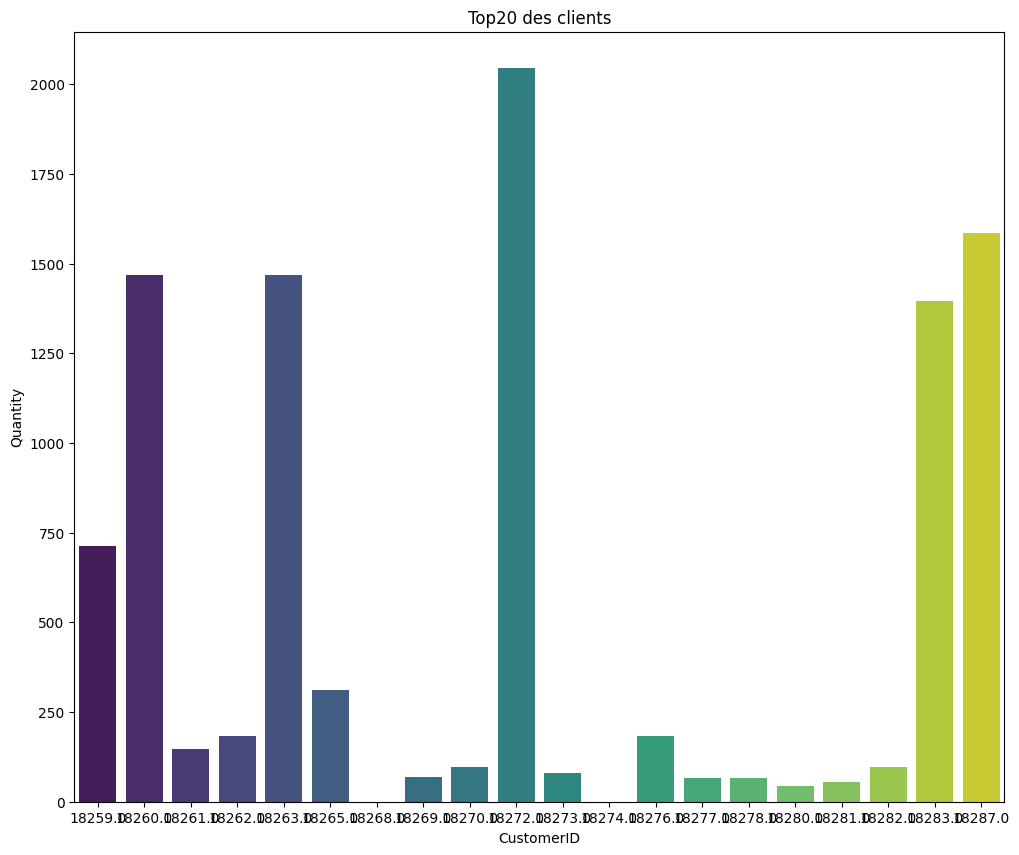

In [5]:
## top 20 des clients avec plus de commandes
top_customers = df.groupby('CustomerID')['Quantity'].sum().reset_index().sort_values('CustomerID', ascending=False)
plt.figure(figsize=(12, 10))
z = sns.barplot(x = 'CustomerID', y = 'Quantity', palette='viridis', data = top_customers.head(20))
plt.title('Top20 des clients')
plt.show()
for i in z.containers:
    z.bar_label(i)


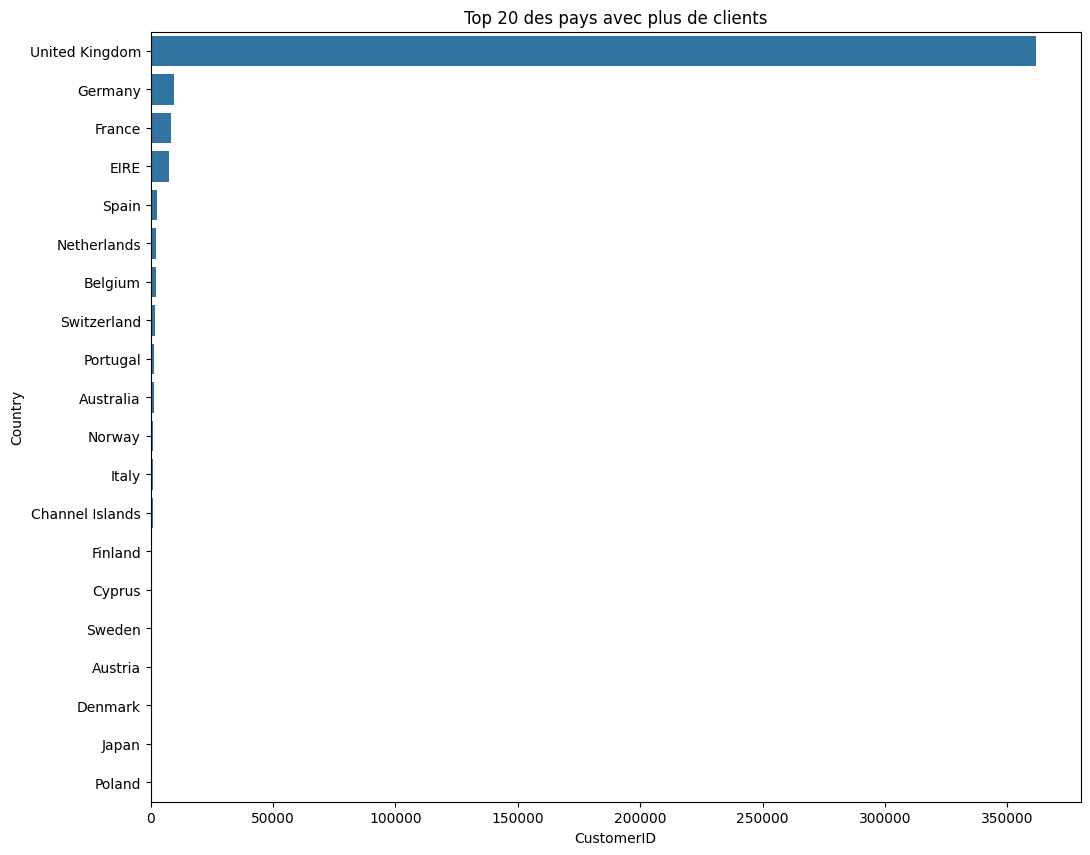

In [6]:
## top des pays avec plus clients 

top_customer_country = df.groupby('Country')['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)
plt.figure(figsize = (12, 10))
z = sns.barplot(x = 'CustomerID', y = 'Country', data = top_customer_country.head(20))
plt.title('Top 20 des pays avec plus de clients')
plt.show()
for x in z.containers:
    z.bar_label(i, label_type='center')

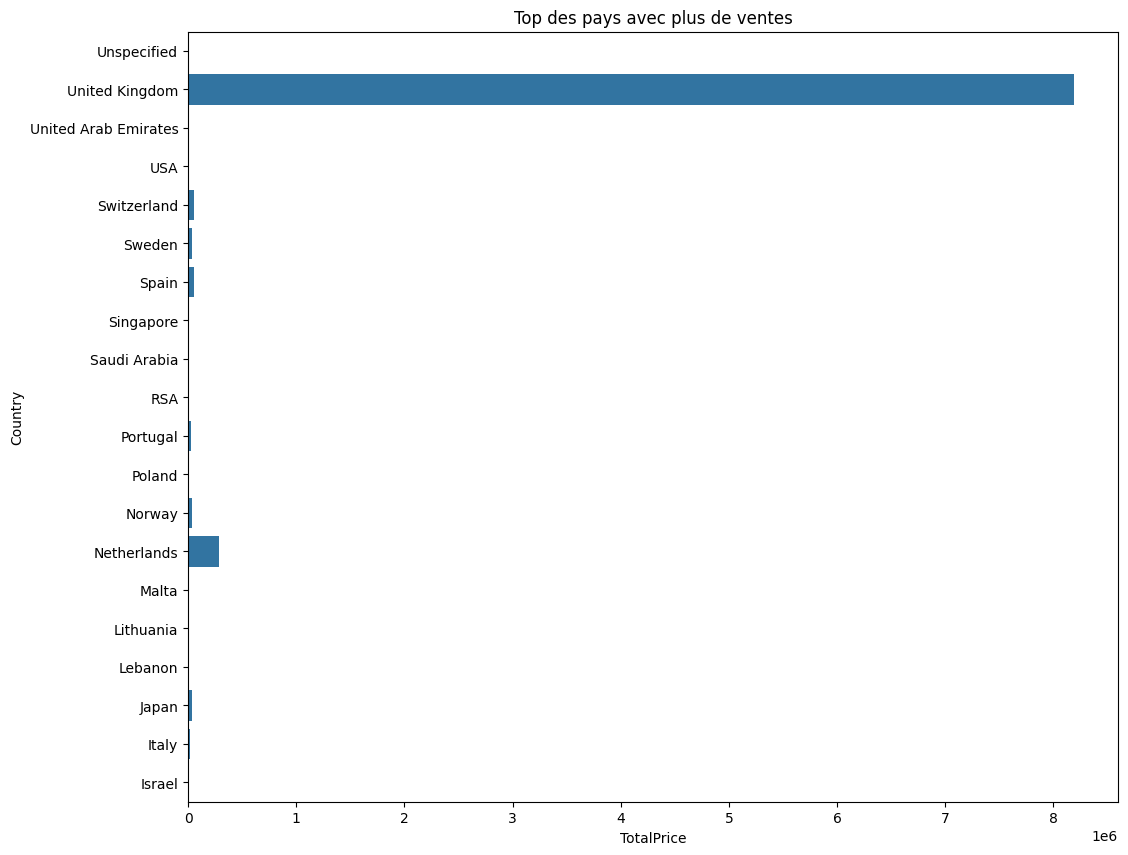

In [7]:
## calcul du prix total de ventes

df['TotalPrice'] = df['Quantity']*df['UnitPrice']

## pays avec plus de d'achats
top_country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index().sort_values('Country', ascending=False)
plt.figure(figsize = (12, 10))
z = sns.barplot(x = 'TotalPrice', y = 'Country', data = top_country_sales.head(20))
plt.title('Top des pays avec plus de ventes')
plt.show()
for y in z.containers:
    z.bar_label(y, label_type='center')
    

/tmp/ipykernel_7334/3924685208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  z = sns.barplot(x='TotalPrice', y='Description', data=total_price.head(20), palette='viridis')


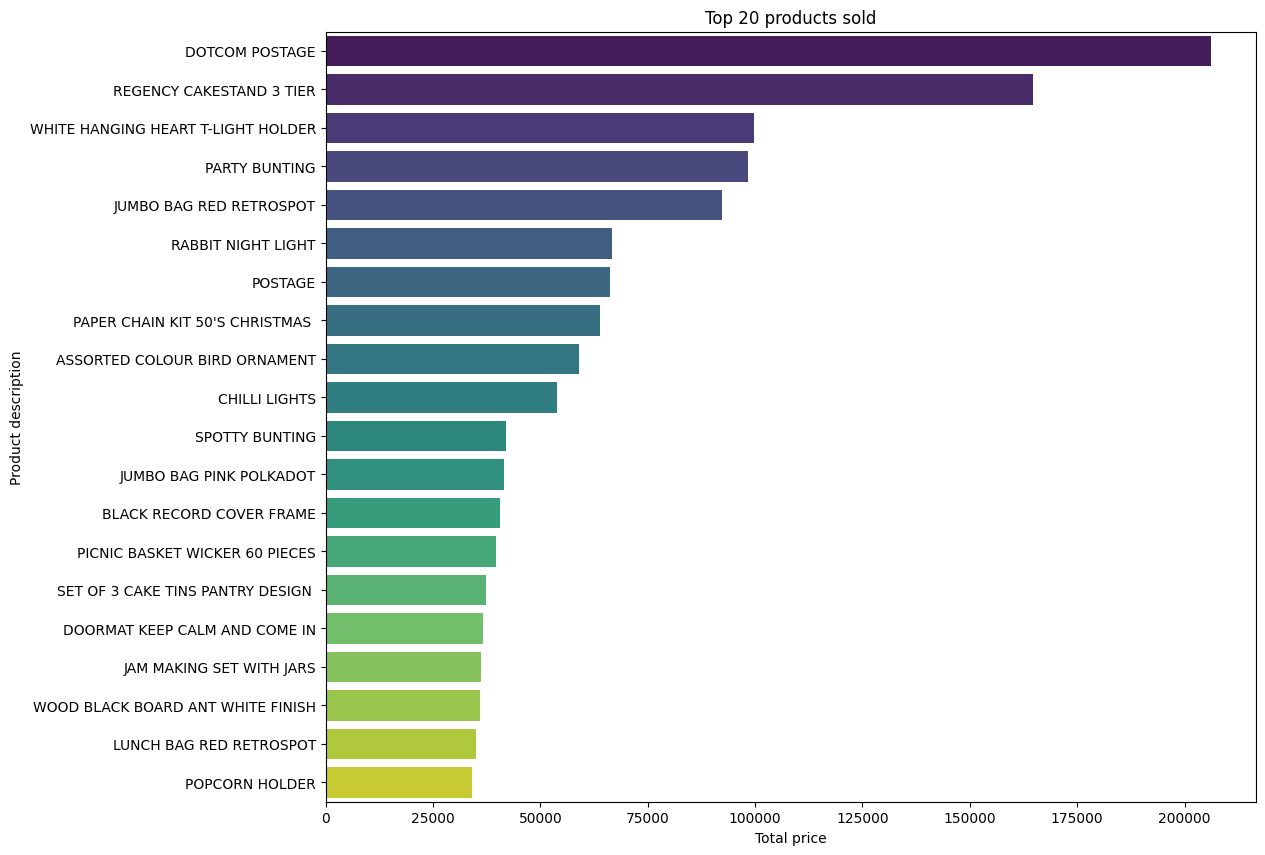

In [8]:
## total price de produit vendu
total_price = df.groupby('Description')['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False)
plt.figure(figsize=(12, 10))
z = sns.barplot(x='TotalPrice', y='Description', data=total_price.head(20), palette='viridis')
plt.title('Top 20 products sold')
plt.xlabel('Total price')
plt.ylabel('Product description')
plt.show()
for y in z.containers:
	z.bar_label(y, label_type='edge')

* Traitements des valeurs manquantes

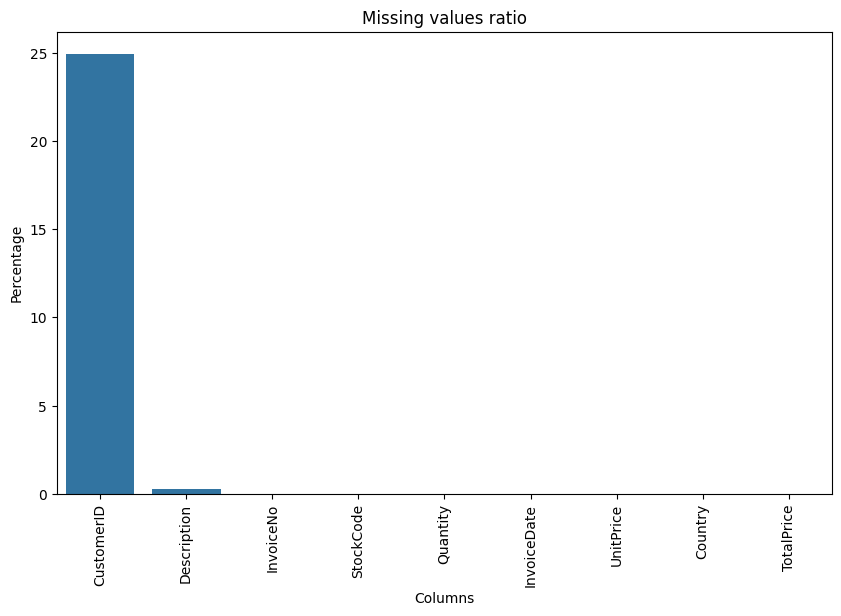

In [9]:
missing_values = df.isnull().sum()
## pourcentage of missing values
ratio = missing_values / df.shape[0] * 100
missing_data = pd.DataFrame({'missing_values': missing_values, 'ratio': ratio})
missing_data = missing_data.sort_values(by='ratio', ascending = False)
missing_data

## visualization of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data['ratio'])
plt.title('Missing values ratio')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='ignore')

## fill the misisng valuees of description by most_frequent 
most_frequent = df['Description'].mode()[0]
df['Description'] = df['Description'].fillna(most_frequent)

## for customersID
median_customer = df['CustomerID'].mean()
df['CustomerID'] = df['CustomerID'].fillna(median_customer)

df.isnull().sum()

/tmp/ipykernel_7334/557693203.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='ignore')


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
## extraction des years, date and month
df['Year'] = df['InvoiceDate'].dt.year

## month
df['Month'] = df['InvoiceDate'].dt.month
#day
df['Day'] = df['InvoiceDate'].dt.day

df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day
44907,540245,22301,COFFEE MUG CAT + BIRD DESIGN,24,2011-01-05 15:42:00,2.55,13082.00000,United Kingdom,61.20,2011,1,5
402815,571508,23102,SILVER HEARTS TABLE DECORATION,1,2011-10-17 15:27:00,2.46,15287.69057,United Kingdom,2.46,2011,10,17
97390,544603,22236,CAKE STAND 3 TIER MAGIC GARDEN,24,2011-02-22 09:10:00,10.95,17526.00000,United Kingdom,262.80,2011,2,22
351158,567662,21581,SKULLS DESIGN COTTON TOTE BAG,2,2011-09-21 15:12:00,2.25,17758.00000,United Kingdom,4.50,2011,9,21
430605,573585,22348,TEA BAG PLATE RED RETROSPOT,1,2011-10-31 14:41:00,1.63,15287.69057,United Kingdom,1.63,2011,10,31


In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
Year                    int32
Month                   int32
Day                     int32
dtype: object

In [14]:
df['CustomerID'] = df['CustomerID'].astype('int')

* Quantité de produit vendu  par années, par mois et par jour

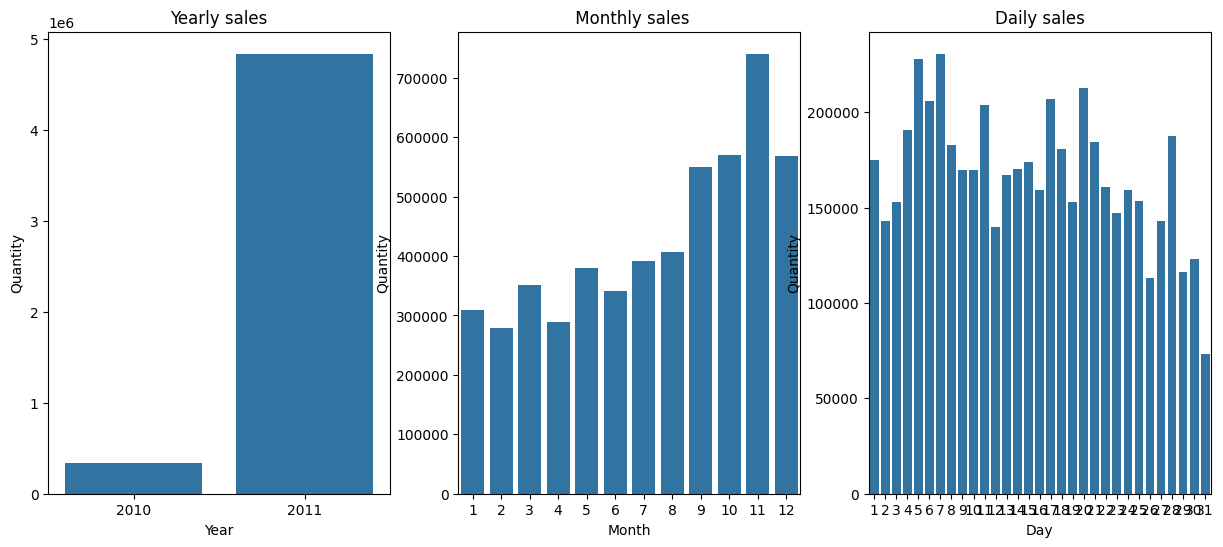

In [15]:
top_year_sales = df.groupby('Year')['Quantity'].sum().reset_index()
## par mois
top_month_sales = df.groupby('Month')['Quantity'].sum().reset_index()

# par jour
top_day_sales = df.groupby('Day')['Quantity'].sum().reset_index()

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.barplot(x='Year', y='Quantity', data=top_year_sales, ax=ax[0])
sns.barplot(x='Month', y='Quantity', data=top_month_sales, ax=ax[1])
sns.barplot(x = 'Day', y = 'Quantity', data = top_day_sales, ax=ax[2])
ax[0].set_title('Yearly sales')
ax[1].set_title(' Monthly sales')
ax[2].set_title('Daily sales')
plt.show()

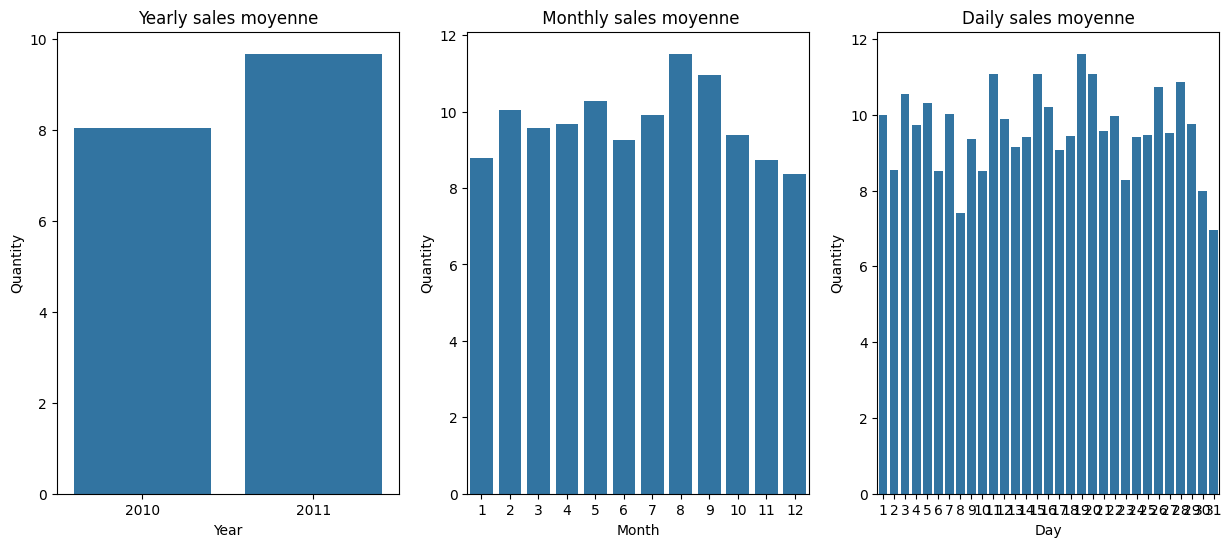

In [16]:
top_year_sales = df.groupby('Year')['Quantity'].mean().reset_index()
## par mois
top_month_sales = df.groupby('Month')['Quantity'].mean().reset_index()

# par jour
top_day_sales = df.groupby('Day')['Quantity'].mean().reset_index()

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.barplot(x='Year', y='Quantity', data=top_year_sales, ax=ax[0])
sns.barplot(x='Month', y='Quantity', data=top_month_sales, ax=ax[1])
sns.barplot(x = 'Day', y = 'Quantity', data = top_day_sales, ax=ax[2])
ax[0].set_title('Yearly sales moyenne')
ax[1].set_title(' Monthly sales moyenne')
ax[2].set_title('Daily sales moyenne')
plt.show()

* filtrez les produits dont les quantités sont < 0

In [17]:
df.shape

(541909, 12)

In [18]:
dff = df[df['Quantity'] >0]
dff.shape

(531285, 12)

* Valeurs des clients

/tmp/ipykernel_7334/4012064271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CustomerID", y = 'TotalPrice', palette= "Set3", data = top_customers.head(10))


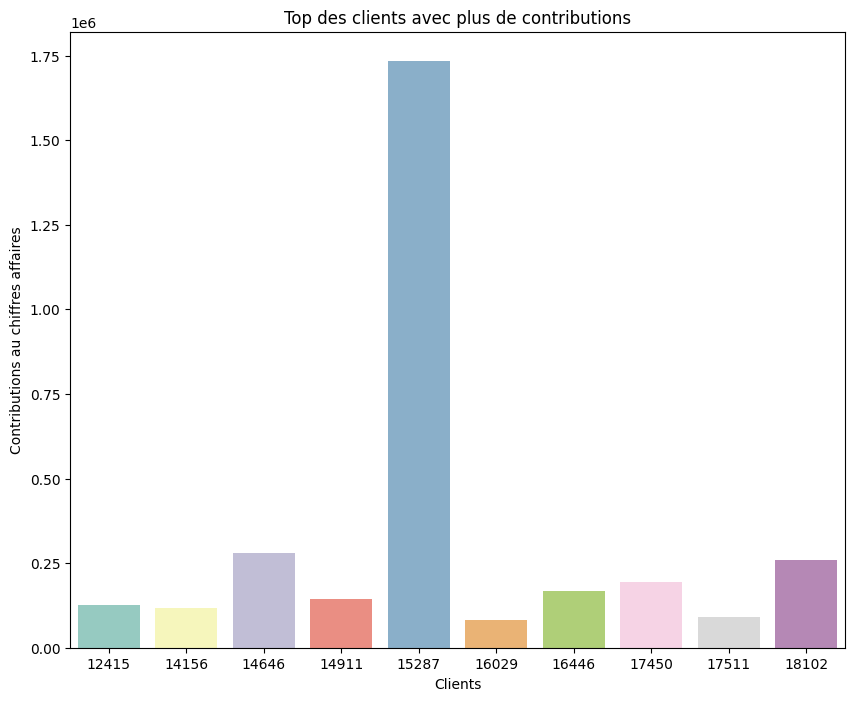

In [19]:
## CLients avec plus de chiffres d'affdaires

top_customers = dff.groupby('CustomerID')['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending = False)
plt.figure(figsize=(10,8))
sns.barplot(x="CustomerID", y = 'TotalPrice', palette= "Set3", data = top_customers.head(10))
plt.title('Top des clients avec plus de contributions')
plt.xlabel('Clients')
plt.ylabel('Contributions au chiffres affaires')
plt.show()

* Nous allons utiliser les variables pertinentes telles que : InvoiceNo, description et Quantity pour le filtrage collaboratif afin d'evaluer l'experience client-produit
### Pour cela :
 * realisons la matrice client-produit : chaque ligne represente un client et chaque colonne un produit ;
 ** Le nombre de fois q'un produit a été acheté
 ** un indicateur binaire (1: acheté, 0 : non acheté) 

In [20]:
dff[['InvoiceNo', 'Description', "Quantity"]].describe()

,Quantity
count,531285.000000
mean,10.655262
std,156.830323
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [21]:
customer_product_matrix = dff.pivot_table(index='CustomerID', values='Quantity', columns="Description", aggfunc='sum').fillna(0)
customer_product_matrix

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Evaluons la similarity client-client

In [22]:
customer_similarity = cosine_similarity(customer_product_matrix)

# convert in dataframe
customer_similarity_df = pd.DataFrame(customer_similarity, index = customer_product_matrix.index, columns=customer_product_matrix.index)
customer_similarity_df.head(20)

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347,0.0,1.000000,0.148879,0.020750,0.014435,0.028933,0.000000,0.022843,0.506252,0.186107,...,0.0,0.001212,0.406837,0.000000,0.015133,0.037236,0.000000,0.010873,0.075245,0.108942
12348,0.0,0.148879,1.000000,0.000169,0.000315,0.001311,0.000000,0.010634,0.286226,0.226244,...,0.0,0.032510,0.168665,0.000000,0.000000,0.000000,0.000000,0.000000,0.177440,0.110096
12349,0.0,0.020750,0.000169,1.000000,0.030121,0.077801,0.000000,0.004931,0.000180,0.150819,...,0.0,0.148066,0.000000,0.000000,0.015680,0.000000,0.000000,0.013398,0.038343,0.005644
12350,0.0,0.014435,0.000315,0.030121,1.000000,0.001610,0.000000,0.000000,0.000000,0.001179,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019636,0.000000
12352,0.0,0.028933,0.001311,0.077801,0.001610,1.000000,0.000000,0.044401,0.000995,0.062460,...,0.0,0.026332,0.000000,0.000000,0.000000,0.000000,0.000000,0.002247,0.016626,0.012497
12353,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.006211,0.032833,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12354,0.0,0.022843,0.010634,0.004931,0.000000,0.044401,0.000000,1.000000,0.000000,0.009087,...,0.0,0.047387,0.000000,0.000000,0.000000,0.002707,0.000435,0.000000,0.105936,0.000000
12355,0.0,0.506252,0.286226,0.000180,0.000000,0.000995,0.006211,0.000000,1.000000,0.008044,...,0.0,0.000540,0.493153,0.000000,0.000000,0.000000,0.000000,0.006539,0.050690,0.201498


* Evaluons la similarity produit-produit

In [23]:
description_similarity = cosine_similarity(customer_product_matrix.T)
description_similarity_df = pd.DataFrame(description_similarity, index= customer_product_matrix.columns, columns= customer_product_matrix.columns)
description_similarity_df.head(20)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.007077,0.004781,0.025644,0.000000,0.031322,0.104103,0.006311,0.020937,0.105002,...,0.102396,0.102396,0.102396,0.102396,0.102396,0.102396,0.102396,0.102396,0.102396,0.102396
50'S CHRISTMAS GIFT BAG LARGE,0.007077,1.000000,0.006734,0.021028,0.000000,0.040170,0.073801,0.901246,0.130259,0.045370,...,0.069117,0.069117,0.069117,0.069117,0.069117,0.069117,0.069117,0.069117,0.069117,0.069117
DOLLY GIRL BEAKER,0.004781,0.006734,1.000000,0.854210,0.979501,0.020207,0.046290,0.005890,0.011116,0.381356,...,0.046488,0.046488,0.046488,0.046488,0.046488,0.046488,0.046488,0.046488,0.046488,0.046488
I LOVE LONDON MINI BACKPACK,0.025644,0.021028,0.854210,1.000000,0.856203,0.094285,0.241235,0.019211,0.057997,0.444195,...,0.248299,0.248299,0.248299,0.248299,0.248299,0.248299,0.248299,0.248299,0.248299,0.248299
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.979501,0.856203,1.000000,0.000000,0.000000,0.000000,0.000000,0.358409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NINE DRAWER OFFICE TIDY,0.031322,0.040170,0.020207,0.094285,0.000000,1.000000,0.305888,0.035609,0.064261,0.160642,...,0.305888,0.305888,0.305888,0.305888,0.305888,0.305888,0.305888,0.305888,0.305888,0.305888
OVAL WALL MIRROR DIAMANTE,0.104103,0.073801,0.046290,0.241235,0.000000,0.305888,1.000000,0.067336,0.195328,0.476385,...,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
RED SPOT GIFT BAG LARGE,0.006311,0.901246,0.005890,0.019211,0.000000,0.035609,0.067336,1.000000,0.127722,0.047336,...,0.061630,0.061630,0.061630,0.061630,0.061630,0.061630,0.061630,0.061630,0.061630,0.061630
SET 2 TEA TOWELS I LOVE LONDON,0.020937,0.130259,0.011116,0.057997,0.000000,0.064261,0.195328,0.127722,1.000000,0.103856,...,0.201977,0.201977,0.201977,0.201977,0.201977,0.201977,0.201977,0.201977,0.201977,0.201977


## Recommandations based sur les produits

* construis une fonction qui permet de fournir des recommandation basées sur les produits
* decouvre les produits similaires à ceux commandés par le client
* recommandez des produits avec des similarity élévées

In [24]:
def recommend_product(product_name, description_similarity_df, customer_product_matrix, num_recommends = 5):
    
    ## trouver les produits similaires
    similar_products = description_similarity_df[product_name].sort_values(ascending = False).index[1:]
    
    # obtenir les scores de popularité pour les produits similaires
    product_popularity = customer_product_matrix[similar_products].sum(axis=0)
    return product_popularity.sort_values(ascending = False).head(num_recommends)

recommend_product(product_name="FELTCRAFT 6 FLOWER FRIENDS", description_similarity_df = description_similarity_df, customer_product_matrix=customer_product_matrix)

Description
PAPER CRAFT , LITTLE BIRDIE           80995.0
MEDIUM CERAMIC TOP STORAGE JAR        78033.0
WHITE HANGING HEART T-LIGHT HOLDER    70442.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047.0
JUMBO BAG RED RETROSPOT               48478.0
dtype: float64

## Recommandations basé sur les Clients

 * Identifier les clients similaires
 * Recommandez les produits achetés par les utilisateurs similaires mais pas encore l'utilisateur cible

In [ ]:
def recommend_for_user(user_id, customer_similarity_df, customer_product_matrix, num_recommends = 5):
    ## identifier les clients similaires
    customer_similar = customer_similarity_df[user_id].sort_values(ascending = False).index[1:]
    ## popularity similiar
    customer_similar_popularity = customer_product_matrix[customer_similar].sum(axis = 0)
    
    # exclure les prodyuits achétes par la cible
    customer_products = customer_product_matrix.loc[user_id]
    recommendations = customer_similar_popularity[customer_products ==0].sort_values(ascending = False)
    return recommendations.head(num_recommends)

recommend_for_user(user_id='17964', customer_similarity_df=customer_similarity_df, customer_product_matrix=customer_product_matrix)

Mettre en place un système de recommandation nécessite une compréhension des différents modèles et approches disponibles. Voici une présentation des principaux modèles que vous pouvez utiliser pour un système de recommandation basé sur le filtrage collaboratif, ainsi qu'un guide détaillé pour leur implémentation étape par étape.

# 1. Modèle de Filtrage Collaboratif Basé sur les Utilisateurs (User-Based Collaborative Filtering)
## Principe :
Les utilisateurs ayant des préférences similaires sont susceptibles d'apprécier des produits similaires.

## Étapes :
	Créer une matrice utilisateur-produit :

	Chaque ligne représente un utilisateur et chaque colonne un produit.
	Les valeurs de la matrice peuvent représenter des notes ou des interactions (achat, clic, etc.).
	Calculer la similarité entre utilisateurs :

	Utilisez des métriques comme :
	Cosinus
	similarity
	Corrélation de Pearson
	Distance euclidienne inversée.
## Exemples en Python : utilisez scipy.spatial.distance ou sklearn.metrics.pairwise.
	Trouver les utilisateurs similaires :

		Pour chaque utilisateur, identifiez les "k" utilisateurs les plus similaires.
		Prédire les scores :

		Moyenne pondérée des scores des utilisateurs similaires.
		Pondérez en fonction des similarités.
	Recommander des produits :

		Sélectionnez les produits non encore notés par l’utilisateur cible avec les meilleurs scores prédits.
## 2. Modèle de Filtrage Collaboratif Basé sur les Items (Item-Based Collaborative Filtering)
	Principe :
		Les produits similaires sont recommandés en fonction des préférences passées des utilisateurs.

	Étapes :
		Créer une matrice utilisateur-produit (comme ci-dessus).

		Calculer la similarité entre les items :

		Métriques similaires au modèle basé sur les utilisateurs (cosinus, Pearson, etc.).
		Cela donne une matrice de similarité item-item.
		Prédire les scores :

		Moyenne pondérée des scores donnés par l'utilisateur aux produits similaires.
	Recommander des produits :

		Trier les produits par score prédictif pour chaque utilisateur.
# 3. Modèle Basé sur la Matrice Factorisée (Matrix Factorization)
## Principe :
	Utilise des techniques comme la factorisation en valeurs singulières (SVD) pour décomposer la matrice utilisateur-produit en matrices plus petites.

## Étapes :
		Créer une matrice utilisateur-produit.

Factorisation de matrice :

Décomposez la matrice en 
𝑈
×
Σ
×
𝑉
𝑇
U×Σ×V 
T
 , où :
𝑈
U représente les préférences des utilisateurs.
𝑉
V représente les caractéristiques des produits.
Σ
Σ est une matrice diagonale des valeurs singulières.
Reconstruction approximative :

En multipliant les matrices décomposées, vous obtenez une approximation de la matrice utilisateur-produit originale, avec des valeurs prédites pour les interactions manquantes.
Recommander des produits :

Identifiez les scores les plus élevés pour chaque utilisateur dans la matrice reconstruite.
Outils :

Utilisez scipy.sparse.linalg.svds ou des frameworks comme Surprise.
4. Modèle Basé sur le Deep Learning
Principe :
Utilise des réseaux de neurones pour apprendre les relations complexes entre utilisateurs et produits.

Étapes :
Préparer les données :

Transformez la matrice utilisateur-produit en un ensemble de paires utilisateur-produit avec des scores (éventuellement sous forme sparse).
Créer un modèle :

Utilisez un Embedding Layer pour encoder les utilisateurs et les produits.
Combinez les embeddings et ajoutez des couches denses.
Entraîner le modèle :

Utilisez une fonction de perte comme l'erreur quadratique moyenne (MSE) pour prédire les scores.
Faire des recommandations :

Prédisez les scores pour tous les produits non encore notés par chaque utilisateur.
Frameworks :

TensorFlow, PyTorch ou Keras.
5. Modèle Hybride
Principe :
Combine plusieurs approches (par exemple, filtrage collaboratif + contenu) pour améliorer la précision.

Étapes :
Filtrage collaboratif :

Implémentez l'une des méthodes ci-dessus (user-based ou item-based).
Filtrage basé sur le contenu :

Recommandez des produits similaires à ceux achetés par l'utilisateur en fonction de leurs caractéristiques (description, prix, catégorie, etc.).
Combinaison des résultats :

Moyenne pondérée ou machine learning pour pondérer les recommandations des deux modèles.
